In [ ]:
## (extra) Comandos de Linux (se debe usar el ! primero)
!ls    #en qué carpeta estoy trabajando
!pwd   #ubicación de la carpeta en donde estoy trabajando

sample_data
/content


In [ ]:
import numpy as np
import matplotlib.pyplot as plt  #librería para graficar

In [ ]:
#Importar librería con algoritmos de Machine Learning
from sklearn.datasets.samples_generator import make_regression  
#make_regression hace que pueda obtener datos para usar

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Generar una data random de regresión
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=35)

#n_samples: cantidad de muestras (filas)
#n_features: cantidad de caracteristicas (columnas)
#noise: nivel de dispersión de los puntos

In [ ]:
#Viendo los tamaños
print(X.shape)   #X tiene 100 filas, pero también puede tener más columnas (fratures/carcteristicas)
print(y.shape)   #y solo puede ser de 1 dimensión

(100, 1)
(100,)


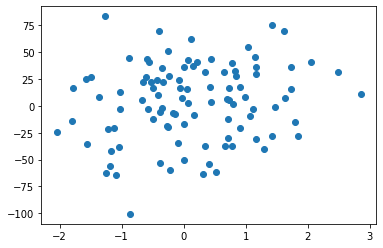

In [ ]:
plt.scatter(X, y)   #Función para plotear puntos
plt.show()

In [ ]:
#Creación de números random
np.random.seed(30)    #para obtener los mismos valores aleatorios
np.random.rand(4)     #obtener 4 números random (uniformes -> [0;1]) el .rand los hace uniformes

array([0.64414354, 0.38074849, 0.66304791, 0.16365073])

[]

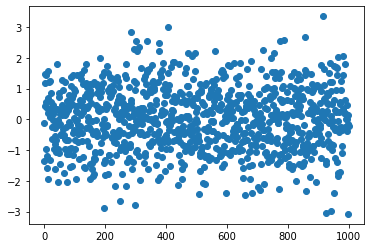

In [ ]:
N=1000
y=np.random.randn(N)  #obtener 1000 números random (no uniformes) el .randn los hace No uniformes
x=np.arange(N)   #creación de índices

plt.scatter(x,y)
plt.plot()

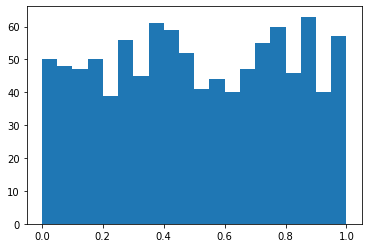

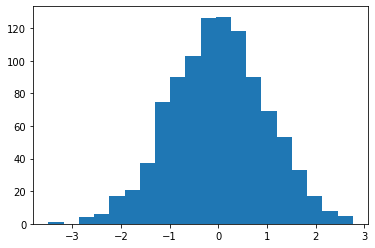

In [ ]:
# Diferencia entre uniforme y no uniforme
uniforme=np.random.rand(1000)
no_uniforme=np.random.randn(1000)

indices=np.arange(N)   #creación de índices

#Uniforme
plt.hist(uniforme, bins=20)   #la prob de que sea cualquier número es similar
plt.show()  

#No uniforme
plt.hist(no_uniforme, bins=20)   #la prob de que sea 0 es la más alta
plt.show()

In [ ]:
#Escoger un valor aleatorio de una matriz
a = np.array([1, 2, 3, 4, 5])
np.random.choice(a, size=2)    #escofer 2 valores aleatorios del vector a

array([5, 4])

In [ ]:
# Crear una matriz con datos aleatorios enteros(de 0a100 en una matriz 10x10)
np.random.randint(100, size=(10,10))

# Forma rudimentaria (chequear solo los comandos para usarlos solos en otra ocasión)
np.floor(100*np.random.rand(10,10)).astype(np.int)
#floor: quita todos los decimales
#astype(np.int): vuelve a enteros a los valores dentro


array([[23, 86, 50, 83, 85, 59, 57, 96, 59, 91],
       [ 8, 81, 29, 31, 73, 43, 52, 50,  3, 15],
       [18, 34, 91, 82, 29, 75, 21, 64, 17, 96],
       [64, 27, 93, 40, 32, 56, 40, 55,  2, 55],
       [39, 57, 37, 60, 25, 43, 78, 99, 22, 75],
       [47, 75, 91, 48, 41,  7, 68,  6, 15, 40],
       [99,  8, 39, 21, 50, 29, 91, 51, 66, 13],
       [81, 37, 40, 89, 40, 64, 51,  0, 36, 39],
       [64, 96, 39, 78, 63, 88,  0, 23, 81, 91],
       [78, 29, 81, 79,  8, 28, 41, 87, 80,  5]])

In [ ]:
#Creación de una imagen random:
imagen = np.random.randint(256, size=(64,64))  #le estoy diciendo que vaya de 0 a 256 y que sea una matriz de 64x64
imagen  

array([[ 71, 152,  39, ..., 218,  84,  37],
       [108,  66, 241, ..., 146,  40, 192],
       [104,  89, 114, ..., 191, 178,  62],
       ...,
       [124, 194, 245, ...,  37, 181,  82],
       [173, 208,  73, ...,   9,  49, 107],
       [  6, 251, 251, ...,  70, 250, 234]])

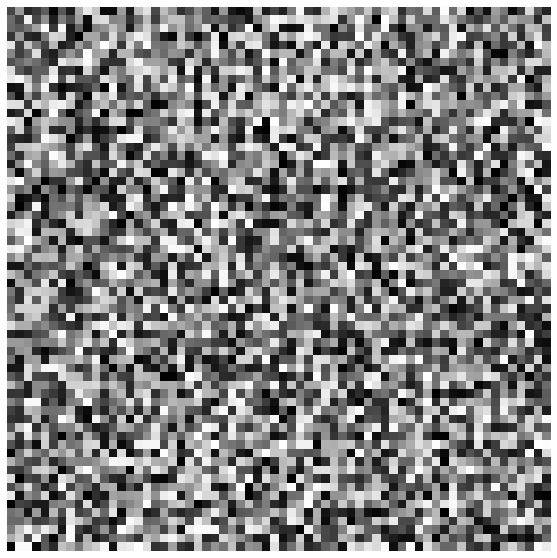

In [ ]:
plt.figure(figsize=(10,10))    #tamaño de la imagen
plt.imshow(imagen, cmap='gray')   #le estoy diciendo que represente la matriz que he creado, pero de color gris
plt.axis('off')    #para quitar los axis y se vea más como una imagen
plt.show()

In [ ]:
#Crear un vector de [0^2, 1^2, ... 9^2] y guardar solo aquello que sean pares
variable = [z**2 for z in range(10) if z%2==0]
variable

# Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  #librería para graficar

In [ ]:
#Importar librería con algoritmos de Machine Learning
from sklearn.datasets.samples_generator import make_regression  
#make_regression hace que pueda obtener datos para usar

In [ ]:
#Generar una data random de regresión
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=5)

#n_samples: cantidad de muestras (filas)
#n_features: cantidad de caracteristicas (columnas)
#noise: nivel de dispersión de los puntos

In [ ]:
## MÉTODO DE LA GRADIENTE:
def gradient_descent(X, y, lr=0.0001, ep=0.0001, max_iter=10000):  #lr = alpha
  converged=False
  count_iter=0

  #Se colocan el valor de cada parámetro aleatoriamente
  w0=np.random.rand(1)
  w1=np.random.rand(1)
  
  ## Función Costo
  N=len(X)   #cantidad de elementos
  J= (1/(2*N))*sum( [ (w0 + w1*X[i] - y[i])**2 for i in range(N) ] )
  #para_ver_graf_Error: 
  costfn = [J]

  ## Gradiente:
  while not converged:
    grad_w0= (1/N)*sum([(w0 + w1*X[i] - y[i])*1 for i in range(N)]) #Notar el *1 que es debido a que x0=1 según la regla de este método
    grad_w1= (1/N)*sum([(w0 + w1*X[i] - y[i])*i for i in range(N)])

    w0 = w0 - lr*grad_w0
    w1 = w1 - lr*grad_w1

    #calcular la nueva Función de costo con los w0 y w1 actualizados
    err= (1/(2*N))*sum([(w0 + w1*X[i] - y[i])**2 for i in range(N)])
    #para_ver_graf_Error: 
    costfn.append(err)

    #para parar (además que cuando ya llega a 1000)
    if abs(J-err)<ep:
      print(f"Converged successfully in iter: {count_iter}")
      converged=True

    if count_iter == max_iter:
      converged=True

    J = err   #actualizando el J
    count_iter +=1
  return w0, w1, costfn

In [ ]:
## Inicialmente vs Al final
#modelo inicial
w0_i = np.random.rand(1)
w1_i = np.random.rand(1)
#modelo final
#w0_f, w1_f = gradient_descent(X, y)
#para_ver_graf_Error tmb: 
w0_f, w1_f, C = gradient_descent(X, y)



Converged successfully in iter: 8265


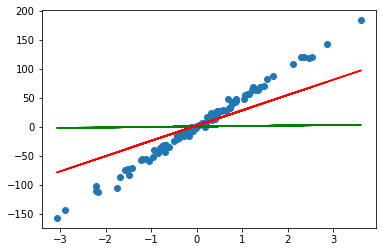

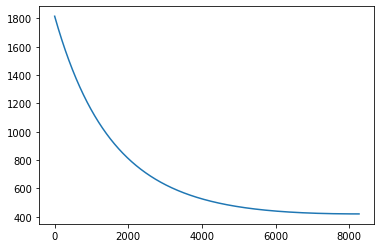

In [ ]:
#gráfica de ambos
plt.scatter(X, y)
plt.plot(X, w0_i+w1_i*X, 'g')
plt.plot(X, w0_f+w1_f*X, 'r')
plt.show()

plt.plot(C)
plt.show()

In [ ]:
print(f"La función de hipótesis es h(x): {np.round(w0_f[0],2)} + {np.round(w1_f[0],2)}*x")

La función de hipótesis es h(x): 1.12 + 33.13*x
